# ROC Curves & AUC metrics
Here we use the `roc_curve` and `auc` faciities in scikit learn to plot some AUC curves.  
- For `GaussianNB` and `KNeighborsClassifier` we use the `predict_proba` method to get scores that can be ranked.  
- For `SVC` we use the `decision_function` method.  

In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

The target is binary but represented as a category variable (`tested_positive`, `tested_negative`).  
We add a column called `target` with 1,0 targets. 

In [12]:
diDF = pd.read_csv('diabetes.csv')
diDF['target'] = np.where(diDF['neg_pos'] == 'tested_positive', 1, 0)
diDF.head()

,preg,plas,pres,skin,insu,mass,pedi,age,neg_pos,target
0,6,148,72,35,0,33.6,0.627,50,tested_positive,1
1,1,85,66,29,0,26.6,0.351,31,tested_negative,0
2,8,183,64,0,0,23.3,0.672,32,tested_positive,1
3,1,89,66,23,94,28.1,0.167,21,tested_negative,0
4,0,137,40,35,168,43.1,2.288,33,tested_positive,1


In [13]:
diDF.pop('neg_pos').values
y = diDF.pop('target').values
X = diDF.values
X.shape, y.shape

((768, 8), (768,))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=1/3)

In [15]:
gnb = GaussianNB()
y_score = gnb.fit(X_train, y_train).predict_proba(X_test)
fprG, tprG, t = roc_curve(y_test, y_score[:,1])
roc_aucG = auc(fprG, tprG)

In [16]:
kNN = KNeighborsClassifier(n_neighbors = 5)
y_score = kNN.fit(X_train, y_train).predict_proba(X_test)
fprN, tprN, t = roc_curve(y_test, y_score[:,1])
roc_aucN = auc(fprN, tprN)

In [17]:
# This cell takes a little while to run
svm = SVC(kernel = 'linear',C=1, probability=True)
di_SVM = svm.fit(X_train, y_train)

In [18]:
y_score = di_SVM.decision_function(X_test)
fprS, tprS, t = roc_curve(y_test, y_score)
roc_aucS = auc(fprS, tprS)

## The ROC Plot

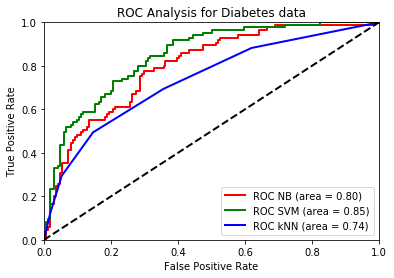

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
lw = 2
plt.plot(fprG, tprG, color='red',
         lw=lw, label='ROC NB (area = %0.2f)' % roc_aucG)
plt.plot(fprS, tprS, color='green',
         lw=lw, label='ROC SVM (area = %0.2f)' % roc_aucS)
plt.plot(fprN, tprN, color='blue',
         lw=lw, label='ROC kNN (area = %0.2f)' % roc_aucN)


plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Analysis for Diabetes data')
plt.legend(loc="lower right")
plt.show()

## Repeat with Synthetic Data
Run the code below to replace `X` and `y` with synthetic data.  
Then rerun the classifiers above and rebuid the ROC curves.

In [10]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, 
                           class_sep = 0.75, random_state=1)